In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('data.csv')

print(df)

In [8]:


# 計算MACD指標的函數
def calculate_macd(df, short_window=12, long_window=26, signal_window=9):
    df['EMA12'] = df['Close'].ewm(span=short_window, min_periods=short_window, adjust=False).mean()
    df['EMA26'] = df['Close'].ewm(span=long_window, min_periods=long_window, adjust=False).mean()
    df['MACD'] = df['EMA12'] - df['EMA26']
    df['Signal_Line'] = df['MACD'].ewm(span=signal_window, min_periods=signal_window, adjust=False).mean()
    df['MACD_Histogram'] = df['MACD'] - df['Signal_Line']
    return df

# 調用計算MACD指標的函數
data = calculate_macd(data)

# 打印出計算後的數據，這裡只打印最後幾行
print(data[['Close', 'EMA12', 'EMA26', 'MACD', 'Signal_Line', 'MACD_Histogram']].tail(20))

data.to_csv('stocks.csv', index=False)


                 Close       EMA12       EMA26      MACD  Signal_Line  \
Date                                                                    
2022-12-02  147.809998  147.243541  147.025198  0.218343     0.246867   
2022-12-05  146.630005  147.149151  146.995924  0.153226     0.228139   
2022-12-06  142.910004  146.496974  146.693264 -0.196289     0.143253   
2022-12-07  140.940002  145.642055  146.267096 -0.625041    -0.010406   
2022-12-08  142.649994  145.181738  145.999163 -0.817424    -0.171809   
2022-12-09  142.160004  144.716856  145.714780 -0.997924    -0.337032   
2022-12-12  144.490005  144.681956  145.624056 -0.942100    -0.458046   
2022-12-13  145.470001  144.803194  145.612645 -0.809451    -0.528327   
2022-12-14  143.210007  144.558088  145.434672 -0.876584    -0.597978   
2022-12-15  136.500000  143.318382  144.772844 -1.454462    -0.769275   
2022-12-16  134.509995  141.963246  144.012633 -2.049387    -1.025298   
2022-12-19  132.369995  140.487361  143.150215 -2.6

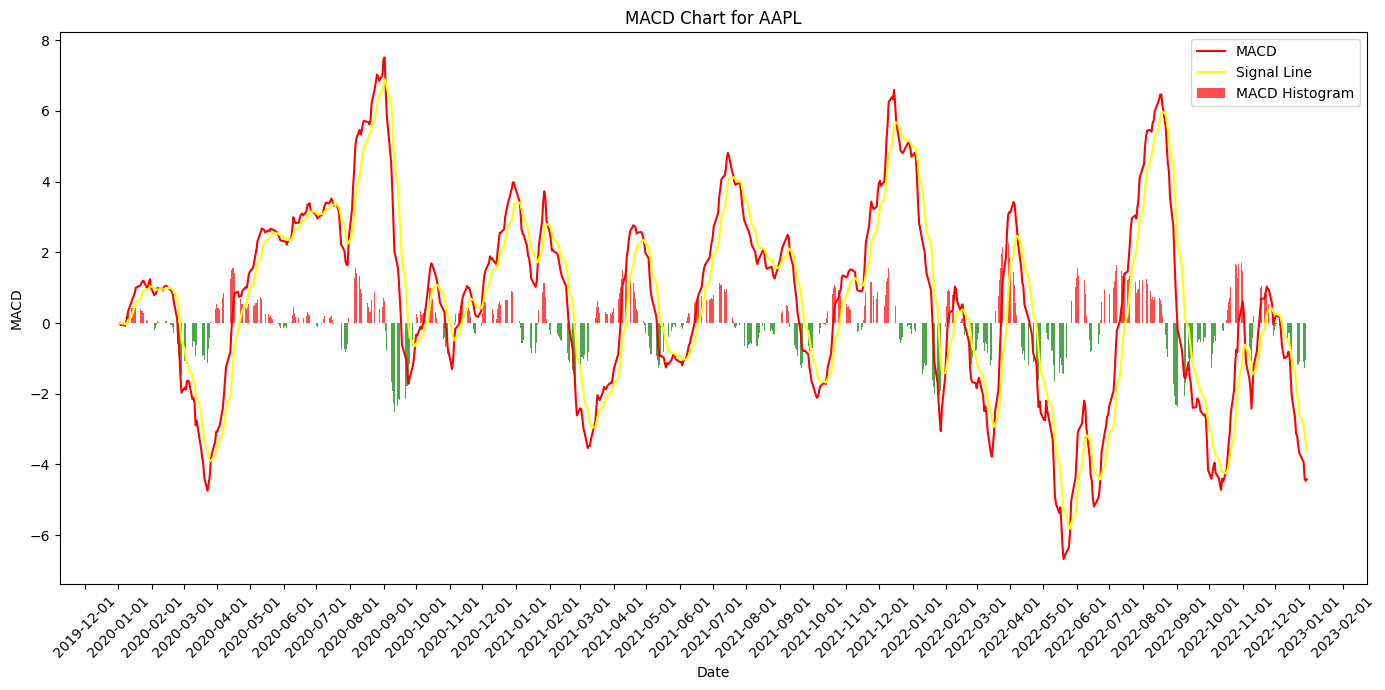

In [14]:
#MACD
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf  # 或者使用其他的金融資料源

# # 下載股票數據
# ticker = 'AAPL'  # 這裡以蘋果公司股票為例
# start_date = '2020-01-01'
# end_date = '2023-01-01'
# data = yf.download(ticker, start=start_date, end=end_date)

# 計算MACD指標
# 快速線（12日EMA）的計算
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
# 慢速線（26日EMA）的計算
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
# MACD線的計算
data['MACD'] = data['EMA_12'] - data['EMA_26']
# 信號線（9日EMA）的計算
data['Signal_line'] = data['MACD'].ewm(span=9, adjust=False).mean()
# 柱狀圖（MACD Histogram）的計算
data['MACD_hist'] = data['MACD'] - data['Signal_line']

# 繪製MACD圖表
plt.figure(figsize=(14, 7))

# 繪製快速線（MACD line），紅色
plt.plot(data.index, data['MACD'], color='red', label='MACD')

# 繪製信號線（Signal line），黃色
plt.plot(data.index, data['Signal_line'], color='yellow', label='Signal Line')

# 繪製柱狀圖（Histogram），高為紅色，低為綠色
plt.bar(data.index, data['MACD_hist'], width=0.7, color=np.where(data['MACD_hist'] >= 0, 'red', 'green'), alpha=0.7, label='MACD Histogram')

# 添加圖表元素和標籤
plt.title('MACD Chart for ' + ticker)
plt.xlabel('Date')
plt.ylabel('MACD')
plt.legend()

# 設置x軸為時間格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()


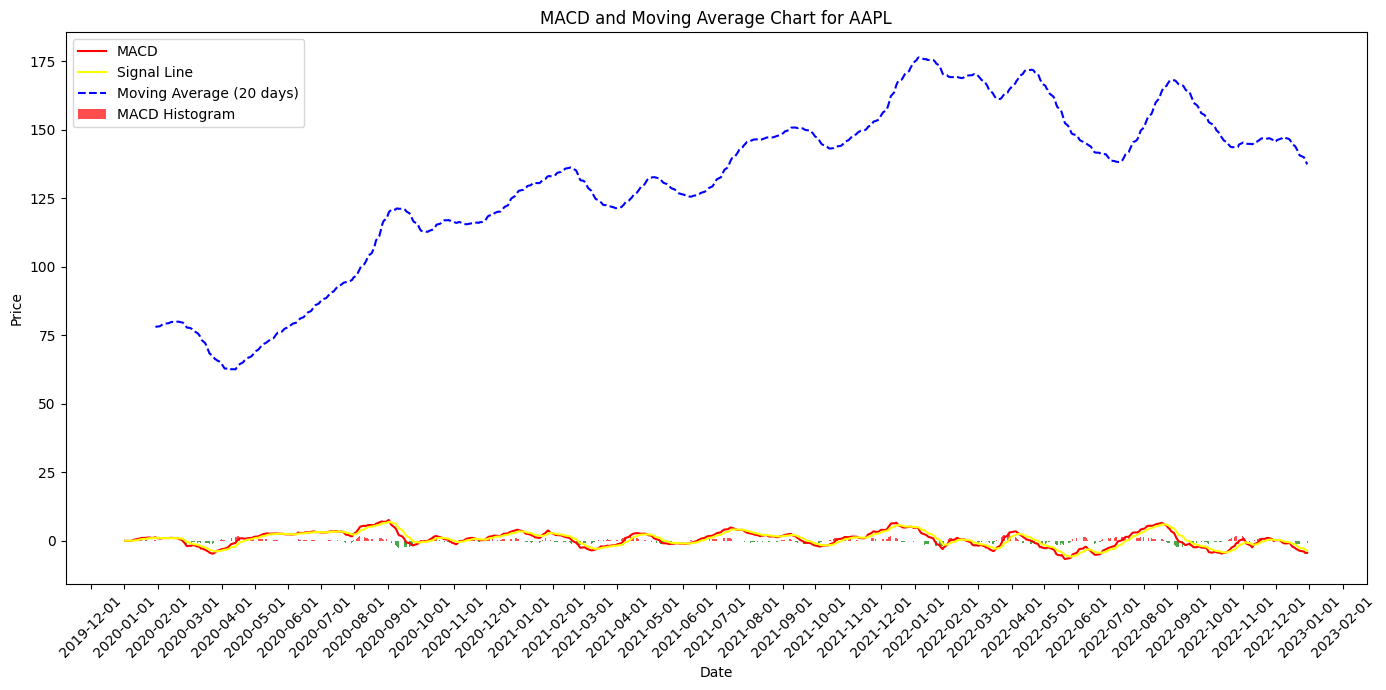

In [15]:
#MACD 與 MA

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import yfinance as yf  # 或者使用其他的金融資料源

# # 下載股票數據
# ticker = 'AAPL'  # 這裡以蘋果公司股票為例
# start_date = '2020-01-01'
# end_date = '2023-01-01'
# data = yf.download(ticker, start=start_date, end=end_date)

# 計算MACD指標
# 快速線（12日EMA）的計算
data['EMA_12'] = data['Close'].ewm(span=12, adjust=False).mean()
# 慢速線（26日EMA）的計算
data['EMA_26'] = data['Close'].ewm(span=26, adjust=False).mean()
# MACD線的計算
data['MACD'] = data['EMA_12'] - data['EMA_26']
# 信號線（9日EMA）的計算
data['Signal_line'] = data['MACD'].ewm(span=9, adjust=False).mean()
# 柱狀圖（MACD Histogram）的計算
data['MACD_hist'] = data['MACD'] - data['Signal_line']

# 計算移動平均（MA）
ma_window = 20
data['MA'] = data['Close'].rolling(window=ma_window).mean()

# 繪製MACD圖表和MA柱狀圖
plt.figure(figsize=(14, 7))

# 繪製快速線（MACD line），紅色
plt.plot(data.index, data['MACD'], color='red', label='MACD')

# 繪製信號線（Signal line），黃色
plt.plot(data.index, data['Signal_line'], color='yellow', label='Signal Line')

# 繪製柱狀圖（Histogram），高為紅色，低為綠色
plt.bar(data.index, data['MACD_hist'], width=0.7, color=np.where(data['MACD_hist'] >= 0, 'red', 'green'), alpha=0.7, label='MACD Histogram')

# 繪製移動平均線（MA），藍色虛線
plt.plot(data.index, data['MA'], color='blue', linestyle='--', label=f'Moving Average ({ma_window} days)')

# 添加圖表元素和標籤
plt.title('MACD and Moving Average Chart for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()

# 設置x軸為時間格式
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.xticks(rotation=45)

# 顯示圖表
plt.tight_layout()
plt.show()


c:\Users\ting\miniconda3\envs\venv1\lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+
C:\Users\ting\AppData\Local\Temp\ipykernel_10536\2023696323.py:27: UserWarning: Glyph 32447 (\N{CJK UNIFIED IDEOGRAPH-7EBF}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ting\AppData\Local\Temp\ipykernel_10536\2023696323.py:27: UserWarning: Glyph 22270 (\N{CJK UNIFIED IDEOGRAPH-56FE}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\ting\AppData\Local\Temp\ipykernel_10536\2023696323.py:27: UserWarning: Glyph 21644

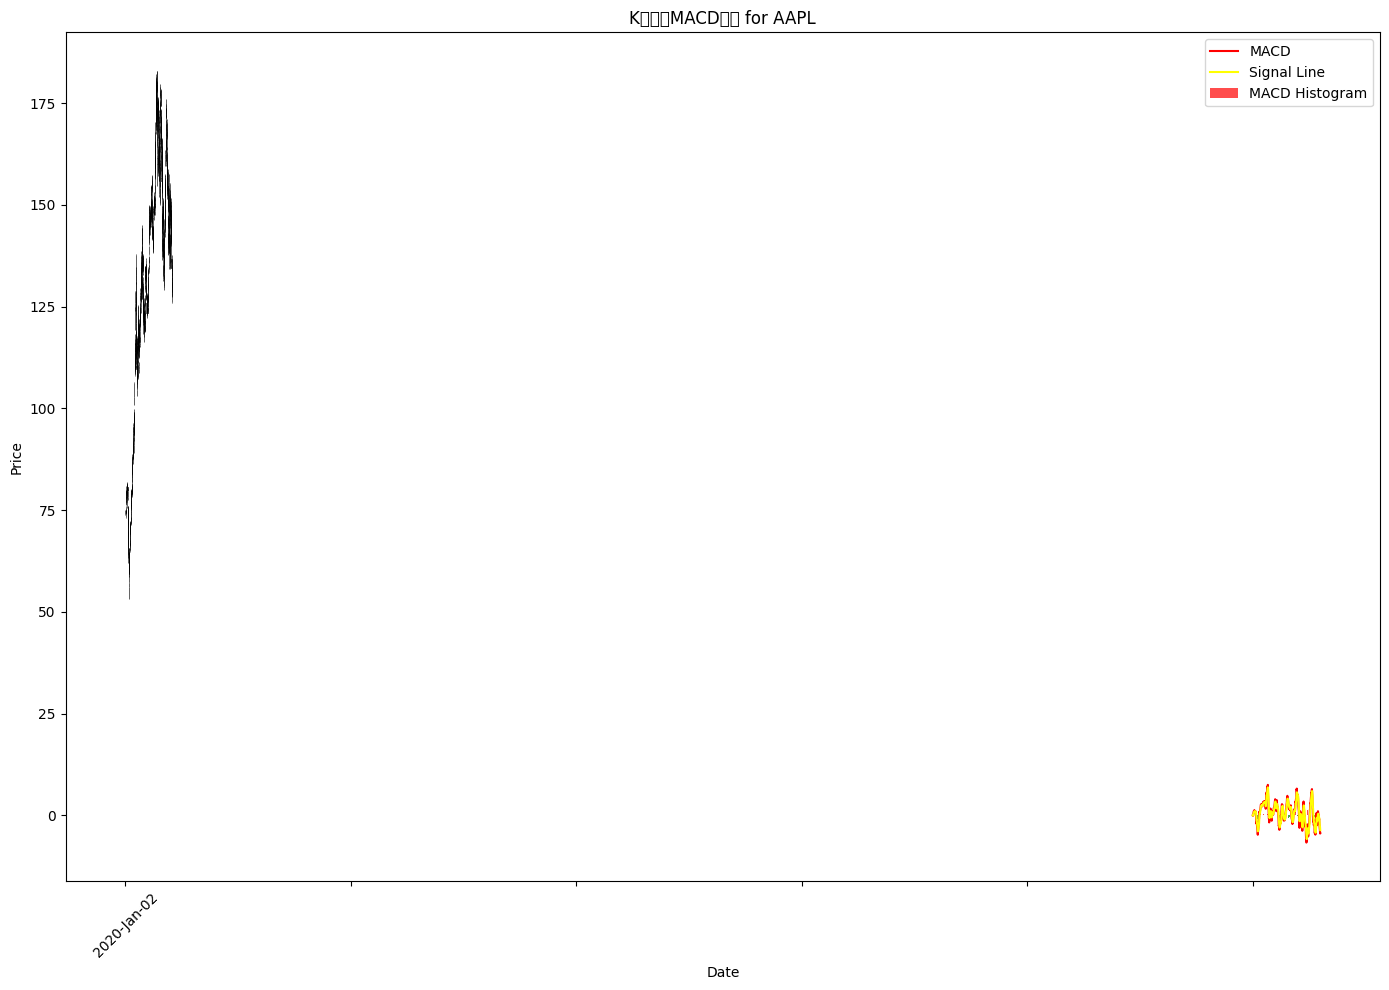

In [19]:

import mplfinance as mpf  # 导入mplfinance库

# 设置K线图的数据
ohlc = data[['Open', 'High', 'Low', 'Close']]

# 创建一个图表
plt.figure(figsize=(14, 10))

# 绘制K线图（蜡烛图）和MACD指标
ax = plt.subplot()

# 绘制K线图（蜡烛图）
mpf.plot(ohlc, type='candle', ax=ax, volume=False, show_nontrading=False)

# 绘制MACD指标
ax.plot(data.index, data['MACD'], color='red', label='MACD')
ax.plot(data.index, data['Signal_line'], color='yellow', label='Signal Line')
ax.bar(data.index, data['MACD_hist'], width=0.7, color=np.where(data['MACD_hist'] >= 0, 'red', 'green'), alpha=0.7, label='MACD Histogram')
ax.legend()

# 设置图表的标题和标签
plt.title('K线图和MACD图表 for ' + ticker)
plt.xlabel('Date')
plt.ylabel('Price')

# 显示图表
plt.tight_layout()
plt.show()
